# Text Classification: Name Gender

Here is a partition of the name gender data into training, dev-test, and test data as shown in the lectures:

In [1]:
import nltk
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

In [2]:
import random
random.seed(1234) # It is useful to set the seed to allow replicability
names = ([(name,'male') for name in m] +
         [(name,'female') for name in f])
random.shuffle(names)
train_names = names[1500:]
devtest_names = names[500:1500]
test_names = names[:500]

And here is one of the classifiers given in the lectures.

In [3]:
def gender_features2(word):
       return {'suffix1': word[-1:],
               'suffix2': word[-2:]}
train_set2=[(gender_features2(n),g) for (n,g) in train_names]
devtest_set2=[(gender_features2(n),g) for (n,g) in devtest_names]
classifier2=nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2,devtest_set2)

0.77

### Exercise: Improve the gender classifier

Can you improve the results of this classifier? This is an open-ended exercise. Choose other features, try to improve the classifier. Use the train set to train the model, and test the results on the dev-test set.

### Exercise: Test the results on the test set

After you have found the best classifier, test it on the test set. Is it still the best classifier?

### Exercise: Plot the impact of the training size

The following code plots the classifier accuracy on the training and dev-test set as we increase the training size. Examine the plot and answer the following questions:

1. From what amount of training data you would judge that the system stops overfitting?
2. From what amount of training data would you say that there is no need to add more training data?

In [4]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10,500,5)
for n in nsamples:
    classifier2 = nltk.NaiveBayesClassifier.train(train_set2[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2,train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2,devtest_set2))

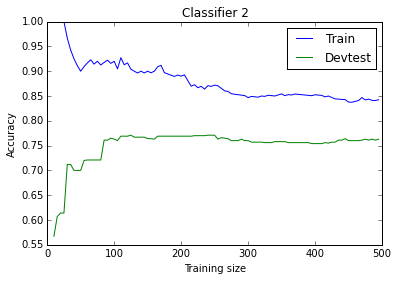

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples,train_accuracy2,label='Train')
plt.plot(nsamples,devtest_accuracy2,label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

### Exercise: Repeat the analysis with your classifier

Repeat the analysis, now using your own classifier. Try to answer the same questions as above.


1. From what amount of training data you would judge that the system stops overfitting?
2. From what amount of training data would you say that there is no need to add more training data?


# K-Nearest Neighbours Classification

Below is some code that trains [sklearn's K-nearest neighbour classifier](http://scikit-learn.org/stable/modules/neighbors.html) for the task of classifying the name gender. The feature extraction creates a vector representing the last character and second last character of the word.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
def gender_features_knn(word):
    "Return a list with the ASCII of the last and second last character"
    return [ord(word[-2]),ord(word[-1])]
train_set_knn=[(gender_features_knn(n),g) for (n,g) in train_names]
devtest_set_knn=[(gender_features_knn(n),g) for (n,g) in devtest_names]
train_X, train_y = zip(*train_set_knn)
knn_classifier = KNeighborsClassifier(n_neighbors=3) # We are using K = 3
knn_classifier.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

### Exercise: Test the classifier

Test the classifier on your dev-test set. Feel free to plot the impact of the training data on the classification results, as you did with the Naive Bayes classifier above.

### Exercise: Impact of K

Compute the accuracy of the classifier for values of K = 1, 2, ... If you wish, plot the accuracy as K increases (it is always easier to see the results in plots). Calculate the accuracy on the training set and the dev-test set and answer these questions.

1. What is the optimal value of K.
2. From what value of K the results do not change?